In [1644]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import joblib
import tensorflow as tf

In [1645]:
x1 = pd.read_csv('C:/Users/FRANK/Desktop/Proyectos Linkedin/Python Proyectos/Redes Neuronales/Dia 23/train.csv') # Trabajar con train
x2 = pd.read_csv('C:/Users/FRANK/Desktop/Proyectos Linkedin/Python Proyectos/Redes Neuronales/Dia 23/test.csv')
x1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1646]:
x2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1647]:
x1_2 = x1.copy()
print('Número de observaciones (filas) = {}'.format(x1_2.shape[0]))
print('Total de variables disponibles (columnas) = {} '.format(x1_2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo -')
print(x1_2.isnull().sum())

Número de observaciones (filas) = 891
Total de variables disponibles (columnas) = 12 
Columnas que cuentan con un valor nulo -
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [1648]:
x1_2.info() # type: ignore

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1649]:
# Cambiar el genero a binario
genero_1_0 = {'male':1,'female':0}
x1_2['Sex'] = x1_2['Sex'].map(genero_1_0) # type: ignore

In [1650]:
from sklearn.impute import KNNImputer

columna_impute = ['Pclass','Sex','Age','SibSp','Parch','Fare']
imputer = KNNImputer(n_neighbors=2)
x1_2[columna_impute] = imputer.fit_transform(x1_2[columna_impute]) # type: ignore

In [1651]:
x1_2 = x1_2.drop(columns='Cabin')

In [1652]:
cabin_mode = x1_2['Embarked'].mode()[0]
x1_2['Embarked'] = x1_2['Embarked'].fillna(cabin_mode)

In [1653]:
x1_2['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [1654]:
x1_2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [1655]:
x1_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    float64
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(6), int64(2), object(3)
memory usage: 76.7+ KB


In [1656]:
# Definir características numéricas y categóricas

numeric_features = ['Survived','Age','SibSp','Parch','Fare']
categorical_features = ['Embarked']

In [1657]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x1_2[numeric_features] = scaler.fit_transform(x1_2[numeric_features]) # type: ignore

In [1658]:
# One-Hot Encoding para características categóricas
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cats = enc.fit_transform(x1_2[categorical_features])

In [1659]:
# Crear DataFrame para las características codificadas
encoded_cats_df = pd.DataFrame(encoded_cats, columns=enc.get_feature_names_out(categorical_features))
x1_2 = pd.concat([x1_2, encoded_cats_df], axis=1)

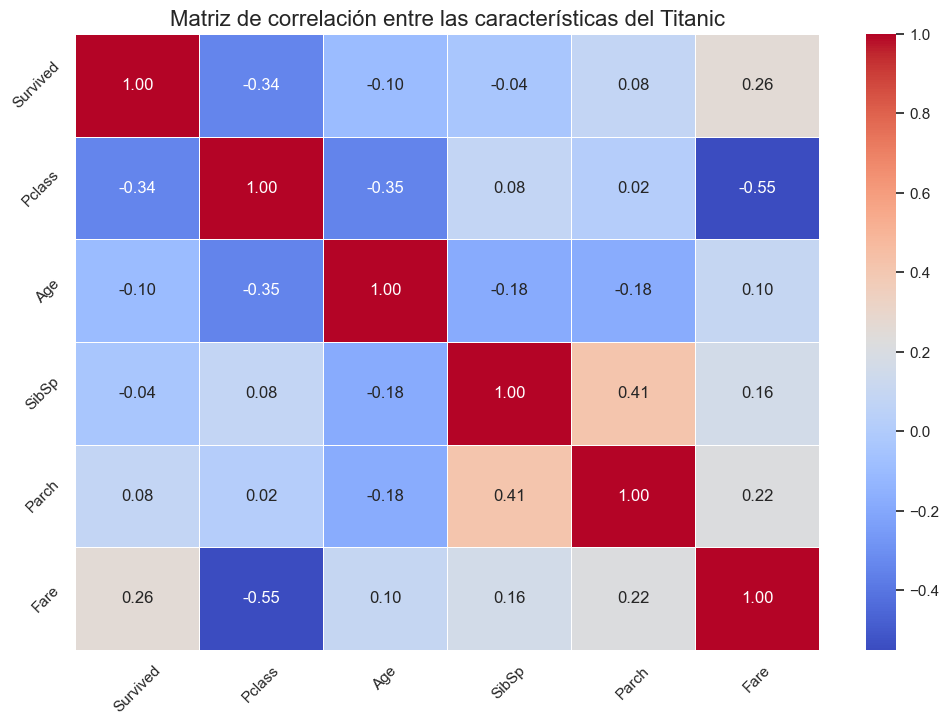

In [1660]:

# Seleccionar las columnas para la matriz de correlación
columns_corr = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
matriz_corr = x1_2[columns_corr].corr()  # Calcula la correlación entre las columnas seleccionadas

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Establecer el estilo de Seaborn
sns.set(style='white')

# Generar el mapa de calor para la matriz de correlación
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Título y ajustes finales
plt.title('Matriz de correlación entre las características del Titanic', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [1661]:
x1_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,-0.789272,3.0,"Braund, Mr. Owen Harris",1.0,-0.581815,0.432793,-0.473674,A/5 21171,-0.502445,S,0.0,0.0,1.0
1,2,1.266990,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,0.539820,0.432793,-0.473674,PC 17599,0.786845,C,1.0,0.0,0.0
2,3,1.266990,3.0,"Heikkinen, Miss. Laina",0.0,-0.301406,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,S,0.0,0.0,1.0
3,4,1.266990,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,0.329513,0.432793,-0.473674,113803,0.420730,S,0.0,0.0,1.0
4,5,-0.789272,3.0,"Allen, Mr. William Henry",1.0,0.329513,-0.474545,-0.473674,373450,-0.486337,S,0.0,0.0,1.0


# X2

In [1662]:
x2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1663]:
x2_2 = x2.copy()
print('Número de observaciones (filas) = {}'.format(x2_2.shape[0]))
print('Total de variables disponibles (columnas) = {} '.format(x2_2.columns.shape[0]))
print('Columnas que cuentan con un valor nulo -')
print(x2_2.isnull().sum())

Número de observaciones (filas) = 418
Total de variables disponibles (columnas) = 11 
Columnas que cuentan con un valor nulo -
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [1664]:
x2_2 = x2_2.drop(columns='Cabin')

In [1665]:
x2_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [1666]:
# Cambiar el genero a binario
genero_2_0 = {'male':1,'female':0}
x2_2['Sex'] = x2_2['Sex'].map(genero_2_0) # type: ignore

In [1667]:
x2_2.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [1668]:
x2_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 32.8+ KB


In [1669]:
# Definir características numéricas y categóricas

numeric_features_2 = ['Age','SibSp','Parch','Fare']
categorical_features_2 = ['Embarked']

In [1670]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x2_2[numeric_features_2] = scaler.fit_transform(x2_2[numeric_features_2]) # type: ignore

In [1671]:
# One-Hot Encoding para características categóricas
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cats_2 = enc.fit_transform(x2_2[categorical_features_2])

In [1672]:
# Crear DataFrame para las características codificadas
encoded_cats_df_2 = pd.DataFrame(encoded_cats_2, columns=enc.get_feature_names_out(categorical_features_2))
x2_2 = pd.concat([x2_2, encoded_cats_df_2], axis=1)

In [1673]:
x2_2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,0.298549,-0.499470,-0.400248,330911,-0.497811,Q,0.0,1.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,1.181328,0.616992,-0.400248,363272,-0.512660,S,0.0,0.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",1,2.240662,-0.499470,-0.400248,240276,-0.464532,Q,0.0,1.0,0.0
3,895,3,"Wirz, Mr. Albert",1,-0.231118,-0.499470,-0.400248,315154,-0.482888,S,0.0,0.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,-0.584229,0.616992,0.619896,3101298,-0.417971,S,0.0,0.0,1.0


# Eliminar columnas object para predecir

In [1674]:
x1_2 = x1_2.drop(columns=['Name','Ticket','Embarked'])

In [1675]:
x1_2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,-0.789272,3.0,1.0,-0.581815,0.432793,-0.473674,-0.502445,0.0,0.0,1.0
1,2,1.266990,1.0,0.0,0.539820,0.432793,-0.473674,0.786845,1.0,0.0,0.0
2,3,1.266990,3.0,0.0,-0.301406,-0.474545,-0.473674,-0.488854,0.0,0.0,1.0
3,4,1.266990,1.0,0.0,0.329513,0.432793,-0.473674,0.420730,0.0,0.0,1.0
4,5,-0.789272,3.0,1.0,0.329513,-0.474545,-0.473674,-0.486337,0.0,0.0,1.0


In [1676]:
# Definir X e y
X = x1_2.drop(columns=['Survived'])
y = x1_2['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Predicción

In [1677]:
oculta = tf.keras.layers.Dense(units=6,input_shape=[10])
oculta1 = tf.keras.layers.Dense(units=6)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta,oculta1,salida])

In [1678]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [1679]:
print('Comenzando entrenamiento')
historial = modelo.fit(X_train,y_train,epochs=2000,verbose=False)
print('Modelo entrenado')

Comenzando entrenamiento
Modelo entrenado


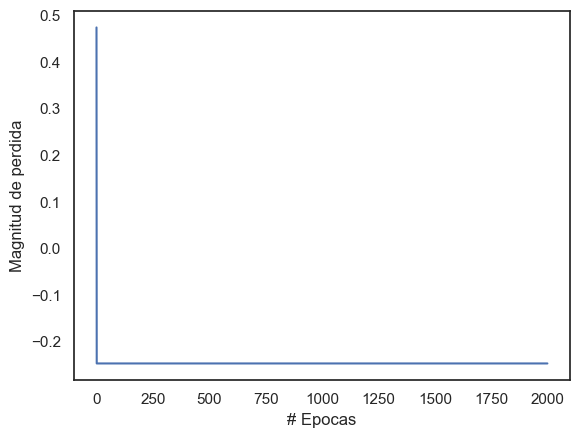

In [1680]:
plt.xlabel('# Epocas')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])

In [1686]:
# Realizar la predicción
print('Vamos a hacer una predicción')
nuevo_dato = np.array([[1, 3, 10, 70, 10, 10, 15,0,0,0]])  # Ejemplo de nuevo dato con las 7 características numéricas
nuevo_dato[:, :4] = scaler.transform(nuevo_dato[:, :4])  # Escalar las características numéricas
resultado = modelo.predict(nuevo_dato)

print(f'El resultado es: {resultado[0][0]}')

Vamos a hacer una predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
El resultado es: -3.01926326751709


In [1688]:
# Realizar predicciones usando el modelo entrenado
predicciones = modelo.predict(X)

predicciones_binarias = predicciones.astype(int)

x2_2['Survived'] = predicciones_binarias

# Verificar las primeras filas del DataFrame con las predicciones
print(x2_2.head())

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ValueError: Length of values (891) does not match length of index (418)